Minimal example of Bernoulli used in 1D Gaussian Mixture model, with AutoLowRankMultivariateNormal guide and enumeration used for inference.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pyro
import pyro.distributions as dist
from pyro import poutine
from pyro.infer.autoguide import AutoLowRankMultivariateNormal
from pyro.infer import SVI, TraceEnum_ELBO, infer_discrete, config_enumerate
from pyro.infer import Predictive
from pyro.poutine import block
from pyro.infer.autoguide.initialization import init_to_value
import pandas as pd

Produce some data from two Normal distributions with different means:

In [2]:
def generate_data(n_components = 3, n_observations = 100, ps = torch.tensor((0.2, 0.3, 0.5))):
    
    mus = torch.tensor((5., 10., 15.))
    b = pyro.sample('b', dist.Categorical(probs = ps).expand([n_observations]).to_event(1))
    
    print(b)
    
    mean = mus[b]
    
    data = pyro.sample("data_target", dist.Normal(loc = mean, scale = 1.))
    
    return data, b

tensor([1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1,
        1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2,
        1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
        0, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 0,
        2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
        1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
        2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2,
        0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2,
        0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2,
        0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0,
        1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1,
        0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
        2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2,

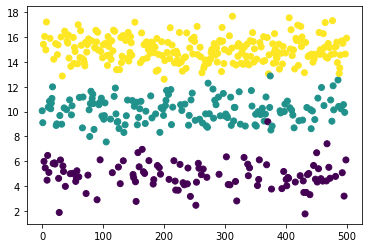

In [3]:
n_components = 3
n_observations = 500
data, b = generate_data(n_components, n_observations)
plt.scatter(range(len(data)), data, c = b)

In [14]:
pd.DataFrame(np.stack([data, b]).T, columns = ('data', 'b')).to_csv('testData.csv')